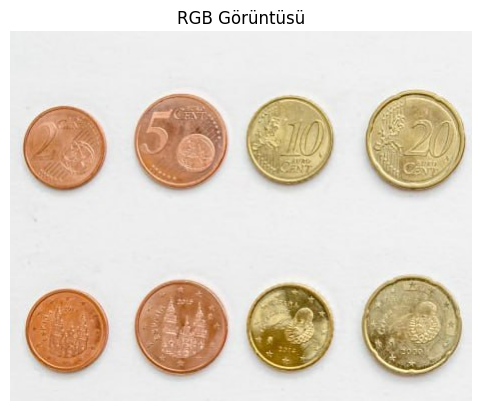

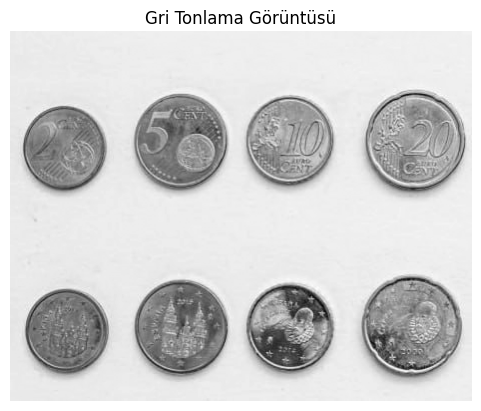

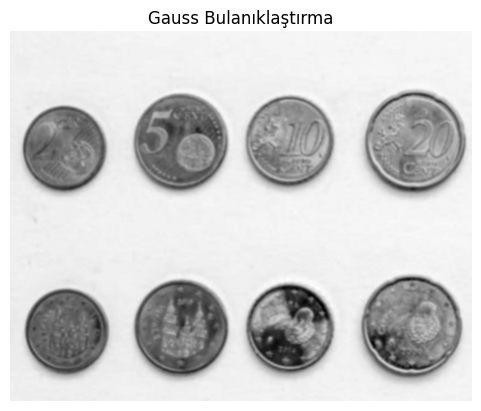

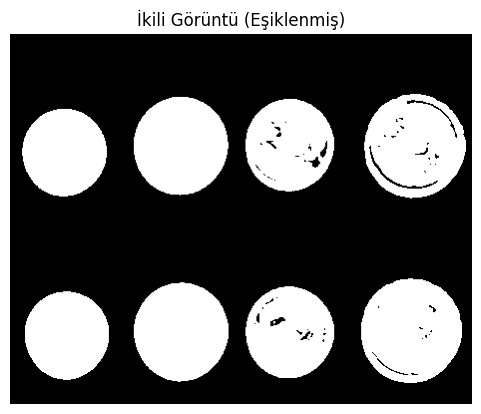

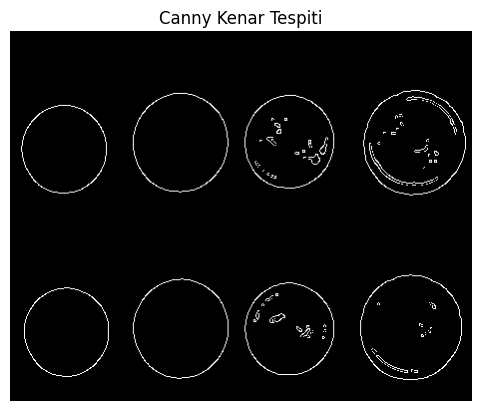

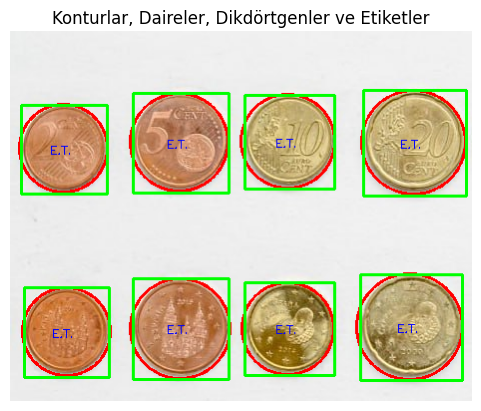

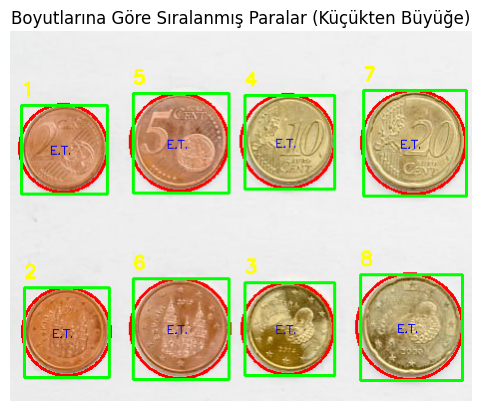

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Resim Okuma (BGR formatında)
para_bgr = cv2.imread("para.jpg")

if para_bgr is None:
    print("Hata: Resim yüklenemedi. Dosya yolunu kontrol edin.")
    exit()

# 2. Renk Dönüşümü (BGR'den RGB'ye)
para_rgb = cv2.cvtColor(para_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(para_rgb)
plt.title("RGB Görüntüsü")
plt.axis("off")
plt.show()

# 3. Gri Tonlama
para_gri = cv2.cvtColor(para_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(para_gri, cmap="gray")
plt.title("Gri Tonlama Görüntüsü")
plt.axis("off")
plt.show()

# 4. Gauss Bulanıklaştırma
bulanik_para = cv2.GaussianBlur(para_gri, (5, 5), 1)  # 5x5 kernel, sigmaX=1
plt.imshow(bulanik_para, cmap="gray")
plt.title("Gauss Bulanıklaştırma")
plt.axis("off")
plt.show()

# 5. Eşikleme (Threshold) Uygulaması
_, para_bin = cv2.threshold(bulanik_para, 200, 255, cv2.THRESH_BINARY_INV)  # Binary ters eşikleme
plt.imshow(para_bin, cmap="gray")
plt.title("İkili Görüntü (Eşiklenmiş)")
plt.axis("off")
plt.show()

# 6. Canny Kenar Bulma
kenar_para = cv2.Canny(para_bin, 1, 10)  # Optimize edilmiş eşikler
plt.imshow(kenar_para, cmap="gray")
plt.title("Canny Kenar Tespiti")
plt.axis("off")
plt.show()

# 7. Kontur Tespiti ve Çizim İşlemleri
contours, _ = cv2.findContours(kenar_para, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
kontorlu_para = para_rgb.copy()  # Çizim için RGB kopyası

for kontur in contours:
    area = cv2.contourArea(kontur)
    if area > 50:
        (x, y), r = cv2.minEnclosingCircle(kontur)
        center = (int(x), int(y))
        radius = int(r)
        cv2.circle(kontorlu_para, center, radius, (255, 0, 0), 2)  # Kırmızı daire (RGB'de (255, 0, 0))

        x, y, w, h = cv2.boundingRect(kontur)
        cv2.rectangle(kontorlu_para, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Yeşil dikdörtgen

        cv2.putText(kontorlu_para, "E.T.", (x + w//2 - 15, y + h//2 + 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)  # Mavi yazı

plt.imshow(kontorlu_para)
plt.title("Konturlar, Daireler, Dikdörtgenler ve Etiketler")
plt.axis("off")
plt.show()

# 8. BONUS: Paraların boyutuna göre sıralama (en küçükten en büyüğe)
paralar = sorted(contours, key=cv2.contourArea)  # Küçükten büyüğe sırala
num_coins = sum(1 for kontur in paralar if cv2.contourArea(kontur) > 500)  # Geçerli kontur sayısı

for i, kontur in enumerate(paralar):
    area = cv2.contourArea(kontur)
    if area > 50:
        x, y, w, h = cv2.boundingRect(kontur)
        label = i + 1  # En küçük para 1 numara olacak şekilde sıralama
        cv2.putText(kontorlu_para, str(label), (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)  # Sarı numara

plt.imshow(kontorlu_para)
plt.title("Boyutlarına Göre Sıralanmış Paralar (Küçükten Büyüğe)")
plt.axis("off")
plt.show()
